In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
from matplotlib import pyplot as plt
csv_path = "C:/Users/edgil/Documents/Masters/machine_learning/Coursework/video_data"

In [16]:
train = r"/1trn.SSV"
train_2 = r"/2trn.SSV" 
train_3 = r"/3trn.SSV"
test = r"/1tst.SSV"
train_data = pd.read_csv(csv_path + train, header = None, sep = "\t")
train_data_2 = pd.read_csv(csv_path + train_2, header = None, sep = "\t")
train_data_3 = pd.read_csv(csv_path + train_3, header = None, sep = "\t")
test_data = pd.read_csv(csv_path + test, header = None, sep = "\t")
train_data_3 = pd.read_csv(csv_path + train, header = None, sep = "\t")

In [25]:
master_train = pd.concat([train_data, train_data_2,train_data_3], axis = 0, ignore_index=True)
print(master_train.tail())

           0         1         2         3         4         5         6   \
895  0.099288  0.092277  0.136102  0.100543  2.715417  2.765798  2.374311   
896  0.258898  0.259862  0.263047  0.239220  1.777180  1.765700  1.730272   
897  0.176918  0.141886  0.186493  0.166736  2.079873  2.267262  2.082483   
898  0.209688  0.207842  0.262951  0.212296  2.110945  2.145125  1.727254   
899  0.022396  0.019911  0.023142  0.015714  4.376526  4.422046  4.419878   

           7         8         9         10        11            12  \
895  2.697291  0.795833  0.766667  0.927083  0.813333  5.882118e+05   
896  1.861857  0.914583  0.904444  0.918750  0.873333  5.361909e+05   
897  2.142334  0.893750  0.808889  0.883333  0.862222  4.810441e+05   
898  2.091695  0.858333  0.841778  0.966667  0.864444  8.759687e+05   
899  4.685342  0.607500  0.575556  0.476643  0.335091  3.284325e+06   

               13            14            15  16  
895  5.930591e+05  6.158411e+05  5.913869e+05   0  
896  5

In [27]:
new_col_names = ["p1", "p2","p3", "p4","p5","p6","p7","p8","p9","p10","p11","p12","p13","p14","p15","p16","target"]
col_names = dict(zip(list(master_train.columns),new_col_names ))
master_train.rename(columns = col_names, inplace=True)
#split the data into predictor and target space


In [44]:
print(Y.head())

   target
0       1
1       0
2       0
3       0
4       0


In [43]:
# set all the abnormal data as 1, lie in 16 column
master_train.loc[master_train['target'] == 255,'target'] = 1
X = master_train.loc[:, master_train.columns != "target"]
Y = pd.DataFrame(master_train['target'], columns = ["target"])
# isolate the abnormal data
abnormal_sample = master_train[master_train['target'] == 1]
normal_sample = master_train[master_train['target'] == 0]
#print(train_data.head())

In [45]:
# Standardise the data using sklearn
from sklearn import preprocessing
# transform X vector into mean 0 and variance 1
X_norm = pd.DataFrame(preprocessing.scale(X),columns = list(X.columns))

C:\Users\edgil\AppData\Local\Programs\Python\Python36\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


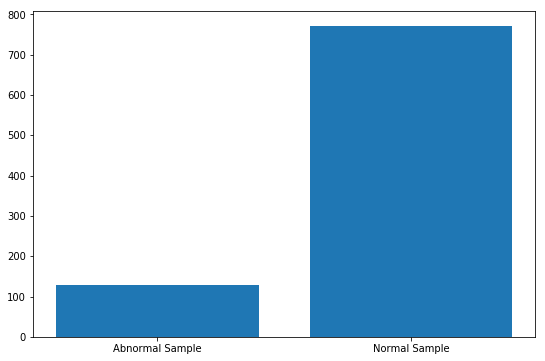

C:\Users\edgil\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


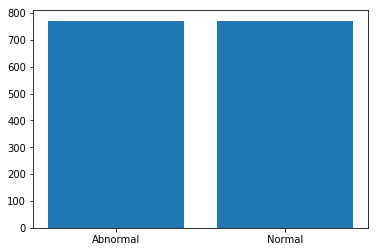

In [56]:
fig = plt.figure(2, figsize=(9, 6))
ax = fig.add_subplot(111)
ax1 = fig.add_subplot(111)
plt.bar(["Normal", "Abnormal"],Y['target'].value_counts())
ax.set_xticklabels(['Abnormal Sample', 'Normal Sample'])#ax.get_figure().savefig("imbalanced_data.png")
plt.show()
# Now we have balanced data.
from imblearn.over_sampling import SMOTE
smt = SMOTE()
X_train, y_train = smt.fit_sample(X_norm, Y)
X_train = pd.DataFrame(X_train, columns = new_col_names[:-1])
y_train = pd.DataFrame(y_train, columns= ['target'])
plt.bar(["Normal", "Abnormal"],y_train['target'].value_counts())
ax1.set_xticklabels(['Abnormal Sample', 'Normal Sample'])
ax1.get_figure().savefig("balanced_data.png")
plt.show()
#print(y_train['target'].value_counts())

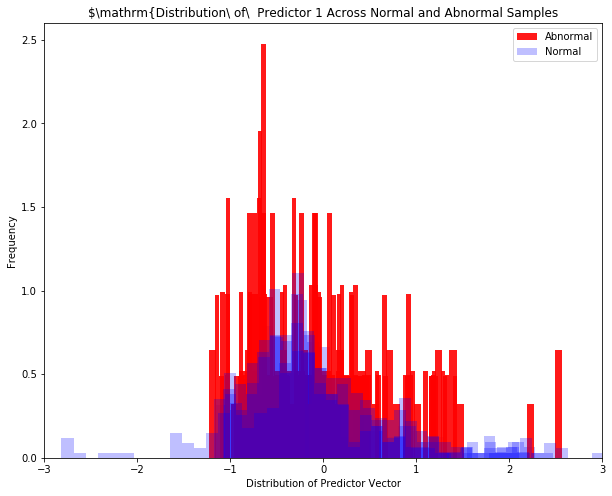

In [39]:
import matplotlib.mlab as mlab
bin = 50
mu, sigma = 0,1 
plt.figure(1, figsize=(10, 8))
n, bins, patches = plt.hist(X_norm.loc[Y['target'] == 1,'p1'], normed=True,color = "r", bins=bin,alpha = 0.9)
n, bins, patches = plt.hist(X_norm.loc[Y['target'] == 0,'p1'], normed=True,color = "b", bins=bin,alpha= 0.25)
n, bins, patches = plt.hist(X_norm.loc[Y['target'] == 1,'p2'], normed=True,color = "r", bins=bin,alpha = 0.9)
n, bins, patches = plt.hist(X_norm.loc[Y['target'] == 1,'p3'], normed=True,color = "r", bins=bin,alpha = 0.9)
n, bins, patches = plt.hist(X_norm.loc[Y['target'] == 1,'p4'], normed=True,color = "r", bins=bin,alpha = 0.9)
n, bins, patches = plt.hist(X_norm.loc[Y['target'] == 1,'p5'], normed=True,color = "r", bins=bin,alpha = 0.9)
n, bins, patches = plt.hist(X_norm.loc[Y['target'] == 0,'p2'], normed=True,color = "b", bins=bin,alpha= 0.25)
n, bins, patches = plt.hist(X_norm.loc[Y['target'] == 0,'p3'], normed=True,color = "b", bins=bin,alpha= 0.25)
n, bins, patches = plt.hist(X_norm.loc[Y['target'] == 0,'p4'], normed=True,color = "b", bins=bin,alpha= 0.25)
n, bins, patches = plt.hist(X_norm.loc[Y['target'] == 0,'p5'], normed=True,color = "b", bins=bin,alpha= 0.25)
plt.xlabel('Distribution of Predictor Vector')
plt.ylabel('Frequency')
plt.title(r'$\mathrm{Distribution\ of\  Predictor 1 Across Normal and Abnormal Samples')
plt.legend(["Abnormal", "Normal"])
plt.xlim(-3,3)
plt.show()
plt.savefig("C:/Users/edgil/Documents/Masters/machine_learning/Coursework/images/TrainDatahistogram.png")

In [41]:
# Run PCA on the predictor variables
from sklearn.decomposition import PCA
X_norm = X_norm.dropna(axis = 0, how = "any")
pca_data = PCA(n_components=16)
# find the PCs
pca = pca_data.fit_transform(X_norm)
# Find the variance explained within each PC
var_exp = pca_data.explained_variance_ratio_

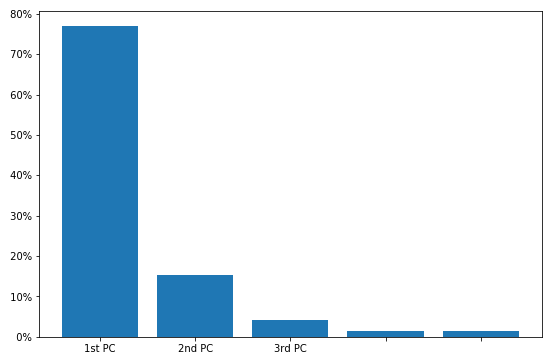

In [43]:
import matplotlib.pyplot as plt
fig = plt.figure(1, figsize=(9, 6))
ax = fig.add_subplot(111)
ax.bar(['1st PC', '2nd PC', "3rd PC", "4th PC", "5th PC"],var_exp[:5])
ax.set_xticklabels(['1st PC', '2nd PC', "3rd PC"])
vals = ax.get_yticks()
ax.set_yticklabels(['{:3.0f}%'.format(x*100) for x in vals])
fig = ax.get_figure()
fig.savefig("varianeExpTrn1.png")

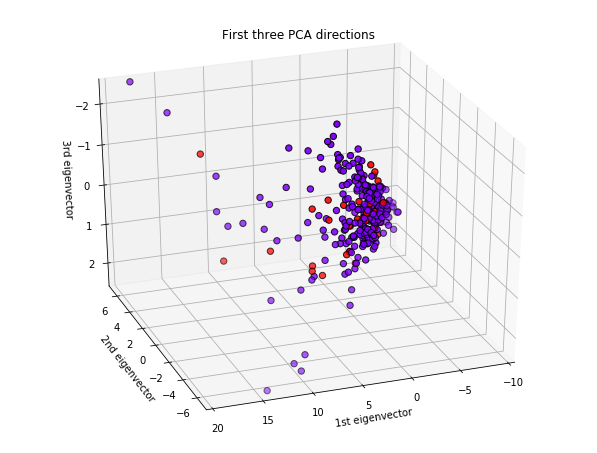

In [66]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
ax.scatter(pca[:, 0], pca[:, 1], pca[:, 2], c=Y['target'],
           cmap="rainbow", edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.set_xlim(-10,20)
ax.set_ylabel("2nd eigenvector")
ax.set_ylim(-7,7)
#ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.set_zlim(-2.5,2.5)
#ax.w_zaxis.set_ticklabels([])
fig = ax.get_figure()
fig.savefig("pca_colon.png")

In [57]:
# quick look at running a logistic regression model
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, 205)
rfe = rfe.fit(X_train, y_train['target'])
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


C:\Users\edgil\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [58]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial').fit(X_train, y_train['target'])


C:\Users\edgil\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [59]:
print(logit.predict(X_norm))
print(logit.predict_proba(X_norm.loc[:2, :]))
print(logit.score(X_train, y_train['target']))

[1 0 1 0 0 1 1 0 0 1 0 1 0 0 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 0 1 0 0 0 0 1
 1 0 1 0 1 0 0 0 1 0 0 1 1 0 1 0 1 0 0 0 1 1 1 0 0 0 1 0 1 0 0 0 1 0 0 1 1
 0 0 0 1 1 1 0 0 1 0 0 1 1 1 0 0 1 0 0 1 1 0 0 1 0 0 0 0 1 1 0 0 1 1 1 1 0
 1 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 1 1 0 1 1 1 0 1
 0 0 0 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0
 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 1 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 1
 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 1 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1
 0 0 1 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 0
 1 0 0 0 1 1 0 0 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 1 1 1 0
 0 0 0 0 1 1 1 1 1 1 0 0 1 0 0 0 1 0 1 1 0 1 0 0 1 1 1 0 0 0 1 1 0 1 0 1 0
 1 1 1 0 0 1 1 0 0 0 1 1 1 0 0 0 0 0 1 0 1 1 0 1 0 1 1 1 0 0 1 1 0 0 1 1 0
 0 1 0 1 0 1 0 1 0 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 0 0 1 0 1 0 1 0 1 0 0 1 1
 0 0 0 0 0 1 1 0 1 1 0 0 

In [60]:
file_name = r"/1tst.SSV"
test_data = pd.read_csv(csv_path + file_name, header = None, sep = "\t")
new_col_names = ["p1", "p2","p3", "p4","p5","p6","p7","p8","p9","p10","p11","p12","p13","p14","p15","p16","target"]
col_names = dict(zip(list(test_data.columns),new_col_names ))
test_data.rename(columns = col_names, inplace=True)
print(test_data.loc[test_data['target'] == 255,'target'])

485     255
486     255
547     255
548     255
608     255
609     255
669     255
670     255
730     255
731     255
791     255
792     255
852     255
853     255
913     255
914     255
974     255
975     255
1035    255
1036    255
1095    255
1096    255
1097    255
1156    255
1157    255
1158    255
1217    255
1218    255
1219    255
1277    255
       ... 
2973    255
2974    255
2975    255
2976    255
2977    255
3028    255
3029    255
3030    255
3031    255
3032    255
3033    255
3034    255
3035    255
3036    255
3037    255
3038    255
3090    255
3091    255
3092    255
3093    255
3094    255
3095    255
3096    255
3097    255
3098    255
3153    255
3154    255
3155    255
3156    255
3157    255
Name: target, Length: 488, dtype: int64


In [61]:
test_data.loc[test_data['target'] == 255,'target'] = 1
#split the data into predictor and target space
X_test = test_data.loc[:, test_data.columns != "target"]
Y_test = pd.DataFrame(test_data['target'], columns = ["target"])
# Standardise the data using sklearn
# transform X vector into mean 0 and variance 1
X_norm_test = pd.DataFrame(preprocessing.scale(X_test),columns = list(X_test.columns))
print(logit.score(X_norm_test, Y_test['target']))
Y_predicted = logit.predict(X_norm_test)

0.5632894383230315


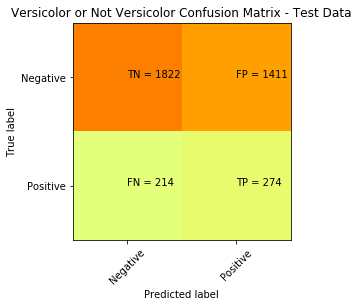

In [62]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test['target'], Y_predicted)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('Versicolor or Not Versicolor Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()
plt

0.8469166408428881